# **Modeling-2**

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import datetime

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [2]:
# 데이터 세트 로드
data = pd.read_csv('전체 데이터 통합.csv', encoding='cp949')

data_2018_first = data[(data['base_date']<'2018-07')]
data_2018_second = data[(data['base_date']>'2018-07') & (data['base_date']<'2019')]
data_2019_first = data[(data['base_date']>'2019') & (data['base_date']<'2019-07')]
data_2019_second = data[(data['base_date']>'2019-07') & (data['base_date']<'2020')]
data_2020_first = data[(data['base_date']>'2020') & (data['base_date']<'2020-07')]
data_2020_second = data[(data['base_date']>'2020-07') & (data['base_date']<'2021')]
data_2021_first = data[(data['base_date']>'2021')]

data_2018_second

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
6697,2018-07-01,서귀포시,남원읍,11280.5985,4372.9992,11479.9450,5610.8058,13612.7756,4907.1454,15407.5826,...,1733940,31824419,25.2,3.2,99.0,999.0,0.00,0.0,10.0,2033700
6698,2018-07-01,서귀포시,대륜동,20781.3558,6137.7039,18571.3670,6432.5488,16744.7640,6844.2464,15142.3048,...,2374658,62782559,25.2,3.2,99.0,999.0,0.00,0.0,10.0,2444400
6699,2018-07-01,서귀포시,대정읍,14135.3173,4733.9554,15847.5161,4552.6424,18055.4207,5320.8515,21519.3753,...,6586502,52341819,25.4,2.2,97.3,999.4,15.42,0.0,0.0,2015350
6700,2018-07-01,서귀포시,대천동,12022.0193,5327.4936,11222.1731,3977.7173,8740.2745,5929.5945,8351.5139,...,1585740,68679289,25.2,3.2,99.0,999.0,0.00,0.0,10.0,1691100
6701,2018-07-01,서귀포시,동홍동,24756.1092,7479.2987,27563.9284,8039.4804,34253.2145,8288.0602,39257.1910,...,3694330,107249672,25.2,3.2,99.0,999.0,0.00,0.0,10.0,4678700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,2018-12-31,제주시,이도2동,81841.6246,44145.9817,81876.2692,47601.6829,102583.6463,48967.7159,102131.1576,...,34217078,131902445,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,8000600
13501,2018-12-31,제주시,이호동,2696.1367,2959.5319,3481.6714,2520.3986,2737.5800,3306.8876,4111.3998,...,2215212,10978931,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,615150
13502,2018-12-31,제주시,일도1동,853.3875,3489.6937,915.7347,2680.7052,1252.5988,3862.3771,1236.2418,...,1208307,5308863,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,647500
13503,2018-12-31,제주시,일도2동,38708.4279,15181.9637,34282.8188,13515.2783,47782.9300,16858.0044,46678.5919,...,40527515,79418469,4.6,0.0,58.6,1033.2,4.81,0.0,8.3,5722400


In [3]:
# 목표변수 설정
y_target_2018_first = data_2018_first['배출량']
y_target_2018_second = data_2018_second['배출량']
y_target_2019_first = data_2019_first['배출량']
y_target_2019_second = data_2019_second['배출량']
y_target_2020_first = data_2020_first['배출량']
y_target_2020_second = data_2020_second['배출량']
y_target_2021_first = data_2021_first['배출량']

X_data_2018_first = data_2018_first.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)
X_data_2018_second = data_2018_second.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)
X_data_2019_first = data_2019_first.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)
X_data_2019_second = data_2019_second.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)
X_data_2020_first = data_2020_first.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)
X_data_2020_second = data_2020_second.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)
X_data_2021_first = data_2021_first.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)

In [4]:
# Train-Test Set 분리
X_train_2018_first, X_test_2018_first, y_train_2018_first, y_test_2018_first = train_test_split(X_data_2018_first, y_target_2018_first, test_size=0.2, random_state=42)
X_train_2018_second, X_test_2018_second, y_train_2018_second, y_test_2018_second = train_test_split(X_data_2018_second, y_target_2018_second, test_size=0.2, random_state=42)
X_train_2019_first, X_test_2019_first, y_train_2019_first, y_test_2019_first = train_test_split(X_data_2019_first, y_target_2019_first, test_size=0.2, random_state=42)
X_train_2019_second, X_test_2019_second, y_train_2019_second, y_test_2019_second = train_test_split(X_data_2019_second, y_target_2019_second, test_size=0.2, random_state=42)
X_train_2020_first, X_test_2020_first, y_train_2020_first, y_test_2020_first = train_test_split(X_data_2020_first, y_target_2020_first, test_size=0.2, random_state=42)
X_train_2020_second, X_test_2020_second, y_train_2020_second, y_test_2020_second = train_test_split(X_data_2020_second, y_target_2020_second, test_size=0.2, random_state=42)
X_train_2021_first, X_test_2021_first, y_train_2021_first, y_test_2021_first = train_test_split(X_data_2021_first, y_target_2021_first, test_size=0.2, random_state=42)

## **XGBoost**

In [5]:
xgb_reg_2018_first = XGBRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100)
xgb_reg_2018_second = XGBRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100)
xgb_reg_2019_first = XGBRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100)
xgb_reg_2019_second = XGBRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100)
xgb_reg_2020_first = XGBRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100)
xgb_reg_2020_second = XGBRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100)
xgb_reg_2021_first = XGBRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100)

In [6]:
# 모델마다 반복하면서 평가 수행
xgb_reg_2018_first.fit(X_train_2018_first, y_train_2018_first)
xgb_reg_2018_second.fit(X_train_2018_second, y_train_2018_second)
xgb_reg_2019_first.fit(X_train_2019_first, y_train_2019_first)
xgb_reg_2019_second.fit(X_train_2019_second, y_train_2019_second)
xgb_reg_2020_first.fit(X_train_2020_first, y_train_2020_first)
xgb_reg_2020_second.fit(X_train_2020_second, y_train_2020_second)
xgb_reg_2021_first.fit(X_train_2021_first, y_train_2021_first)

y_preds_2018_first = xgb_reg_2018_first.predict(X_test_2018_first)
y_preds_2018_second = xgb_reg_2018_second.predict(X_test_2018_second)
y_preds_2019_first = xgb_reg_2019_first.predict(X_test_2019_first)
y_preds_2019_second = xgb_reg_2019_second.predict(X_test_2019_second)
y_preds_2020_first = xgb_reg_2020_first.predict(X_test_2020_first)
y_preds_2020_second = xgb_reg_2020_second.predict(X_test_2020_second)
y_preds_2021_first = xgb_reg_2021_first.predict(X_test_2021_first)

print('##### 2018_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2018_first, y_preds_2018_first))))
print('##### 2018_second #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2018_second, y_preds_2018_second))))
print('##### 2019_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2019_first, y_preds_2019_first))))
print('##### 2019_second #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2019_second, y_preds_2019_second))))
print('##### 2020_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2020_first, y_preds_2020_first))))
print('##### 2020_second #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2020_second, y_preds_2020_second))))
print('##### 2021_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2021_first, y_preds_2021_first))))

##### 2018_first #####
RMSE : 296479.344

##### 2018_second #####
RMSE : 305030.972

##### 2019_first #####
RMSE : 293341.110

##### 2019_second #####
RMSE : 326526.644

##### 2020_first #####
RMSE : 399813.221

##### 2020_second #####
RMSE : 302889.486

##### 2021_first #####
RMSE : 300849.254



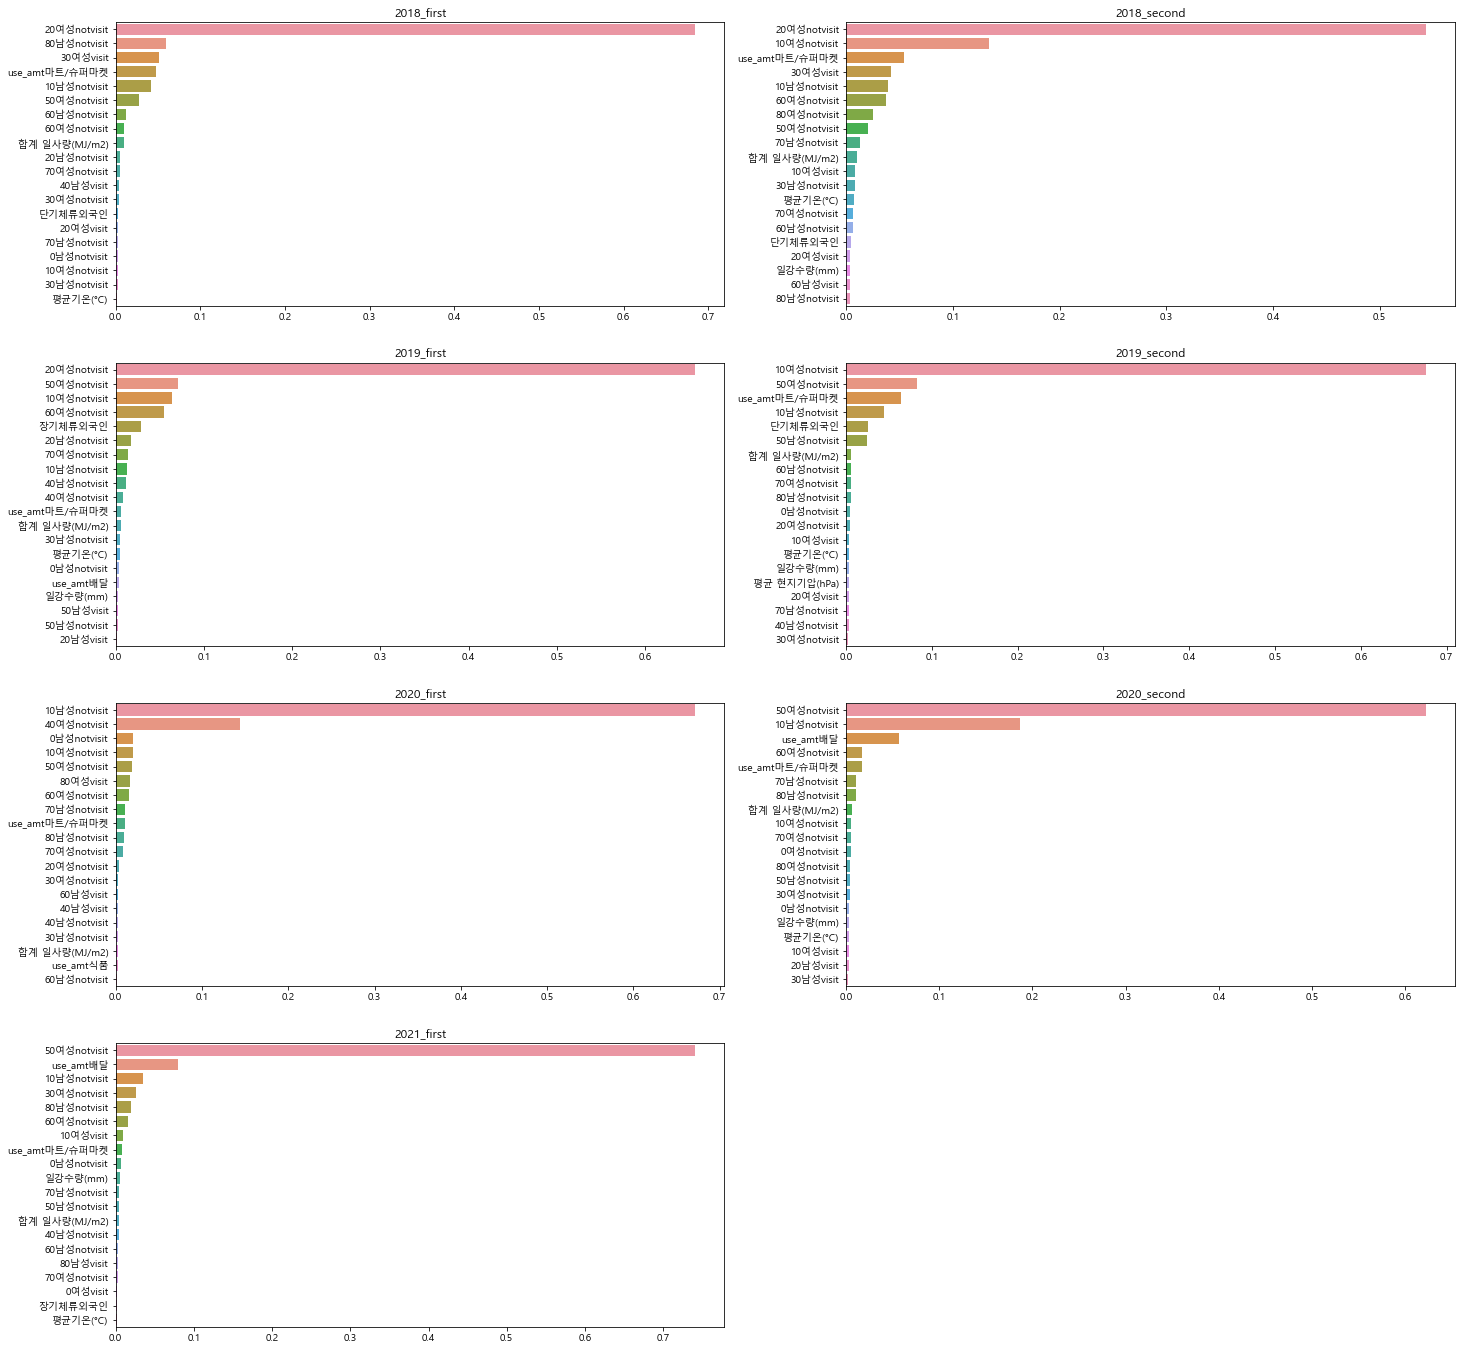

In [7]:
plt.figure(figsize=(24, 24))

plt.subplot(4, 2, 1)
feature_series_1 = pd.Series(data=xgb_reg_2018_first.feature_importances_, index=X_data_2018_first.columns)
feature_series_1 = feature_series_1.sort_values(ascending=False)
sns.barplot(x=feature_series_1[:20], y=feature_series_1[:20].index)
plt.title('2018_first')

plt.subplot(4, 2, 2)
feature_series_2 = pd.Series(data=xgb_reg_2018_second.feature_importances_, index=X_data_2018_second.columns)
feature_series_2 = feature_series_2.sort_values(ascending=False)
sns.barplot(x=feature_series_2[:20], y=feature_series_2[:20].index)
plt.title('2018_second')

plt.subplot(4, 2, 3)
feature_series_3 = pd.Series(data=xgb_reg_2019_first.feature_importances_, index=X_data_2019_first.columns)
feature_series_3 = feature_series_3.sort_values(ascending=False)
sns.barplot(x=feature_series_3[:20], y=feature_series_3[:20].index)
plt.title('2019_first')

plt.subplot(4, 2, 4)
feature_series_4 = pd.Series(data=xgb_reg_2019_second.feature_importances_, index=X_data_2019_second.columns)
feature_series_4 = feature_series_4.sort_values(ascending=False)
sns.barplot(x=feature_series_4[:20], y=feature_series_4[:20].index)
plt.title('2019_second')

plt.subplot(4, 2, 5)
feature_series_5 = pd.Series(data=xgb_reg_2020_first.feature_importances_, index=X_data_2020_first.columns)
feature_series_5 = feature_series_5.sort_values(ascending=False)
sns.barplot(x=feature_series_5[:20], y=feature_series_5[:20].index)
plt.title('2020_first')

plt.subplot(4, 2, 6)
feature_series_6 = pd.Series(data=xgb_reg_2020_second.feature_importances_, index=X_data_2020_second.columns)
feature_series_6 = feature_series_6.sort_values(ascending=False)
sns.barplot(x=feature_series_6[:20], y=feature_series_6[:20].index)
plt.title('2020_second')

plt.subplot(4, 2, 7)
feature_series_7 = pd.Series(data=xgb_reg_2021_first.feature_importances_, index=X_data_2021_first.columns)
feature_series_7 = feature_series_7.sort_values(ascending=False)
sns.barplot(x=feature_series_7[:20], y=feature_series_7[:20].index)
plt.title('2021_first')

plt.show()

## **Light GBM**

In [8]:
lgbm_reg_2018_first = LGBMRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, importance_type='gain')
lgbm_reg_2018_second = LGBMRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, importance_type='gain')
lgbm_reg_2019_first = LGBMRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, importance_type='gain')
lgbm_reg_2019_second = LGBMRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, importance_type='gain')
lgbm_reg_2020_first = LGBMRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, importance_type='gain')
lgbm_reg_2020_second = LGBMRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, importance_type='gain')
lgbm_reg_2021_first = LGBMRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, importance_type='gain')

In [9]:
# 모델마다 반복하면서 평가 수행
lgbm_reg_2018_first.fit(X_train_2018_first, y_train_2018_first)
lgbm_reg_2018_second.fit(X_train_2018_second, y_train_2018_second)
lgbm_reg_2019_first.fit(X_train_2019_first, y_train_2019_first)
lgbm_reg_2019_second.fit(X_train_2019_second, y_train_2019_second)
lgbm_reg_2020_first.fit(X_train_2020_first, y_train_2020_first)
lgbm_reg_2020_second.fit(X_train_2020_second, y_train_2020_second)
lgbm_reg_2021_first.fit(X_train_2021_first, y_train_2021_first)

y_preds_2018_first = lgbm_reg_2018_first.predict(X_test_2018_first)
y_preds_2018_second = lgbm_reg_2018_second.predict(X_test_2018_second)
y_preds_2019_first = lgbm_reg_2019_first.predict(X_test_2019_first)
y_preds_2019_second = lgbm_reg_2019_second.predict(X_test_2019_second)
y_preds_2020_first = lgbm_reg_2020_first.predict(X_test_2020_first)
y_preds_2020_second = lgbm_reg_2020_second.predict(X_test_2020_second)
y_preds_2021_first = lgbm_reg_2021_first.predict(X_test_2021_first)

print('##### 2018_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2018_first, y_preds_2018_first))))
print('##### 2018_second #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2018_second, y_preds_2018_second))))
print('##### 2019_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2019_first, y_preds_2019_first))))
print('##### 2019_second #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2019_second, y_preds_2019_second))))
print('##### 2020_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2020_first, y_preds_2020_first))))
print('##### 2020_second #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2020_second, y_preds_2020_second))))
print('##### 2021_first #####')
print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test_2021_first, y_preds_2021_first))))

##### 2018_first #####
RMSE : 278863.643

##### 2018_second #####
RMSE : 274469.621

##### 2019_first #####
RMSE : 272660.703

##### 2019_second #####
RMSE : 322444.529

##### 2020_first #####
RMSE : 365250.679

##### 2020_second #####
RMSE : 294298.972

##### 2021_first #####
RMSE : 295749.192



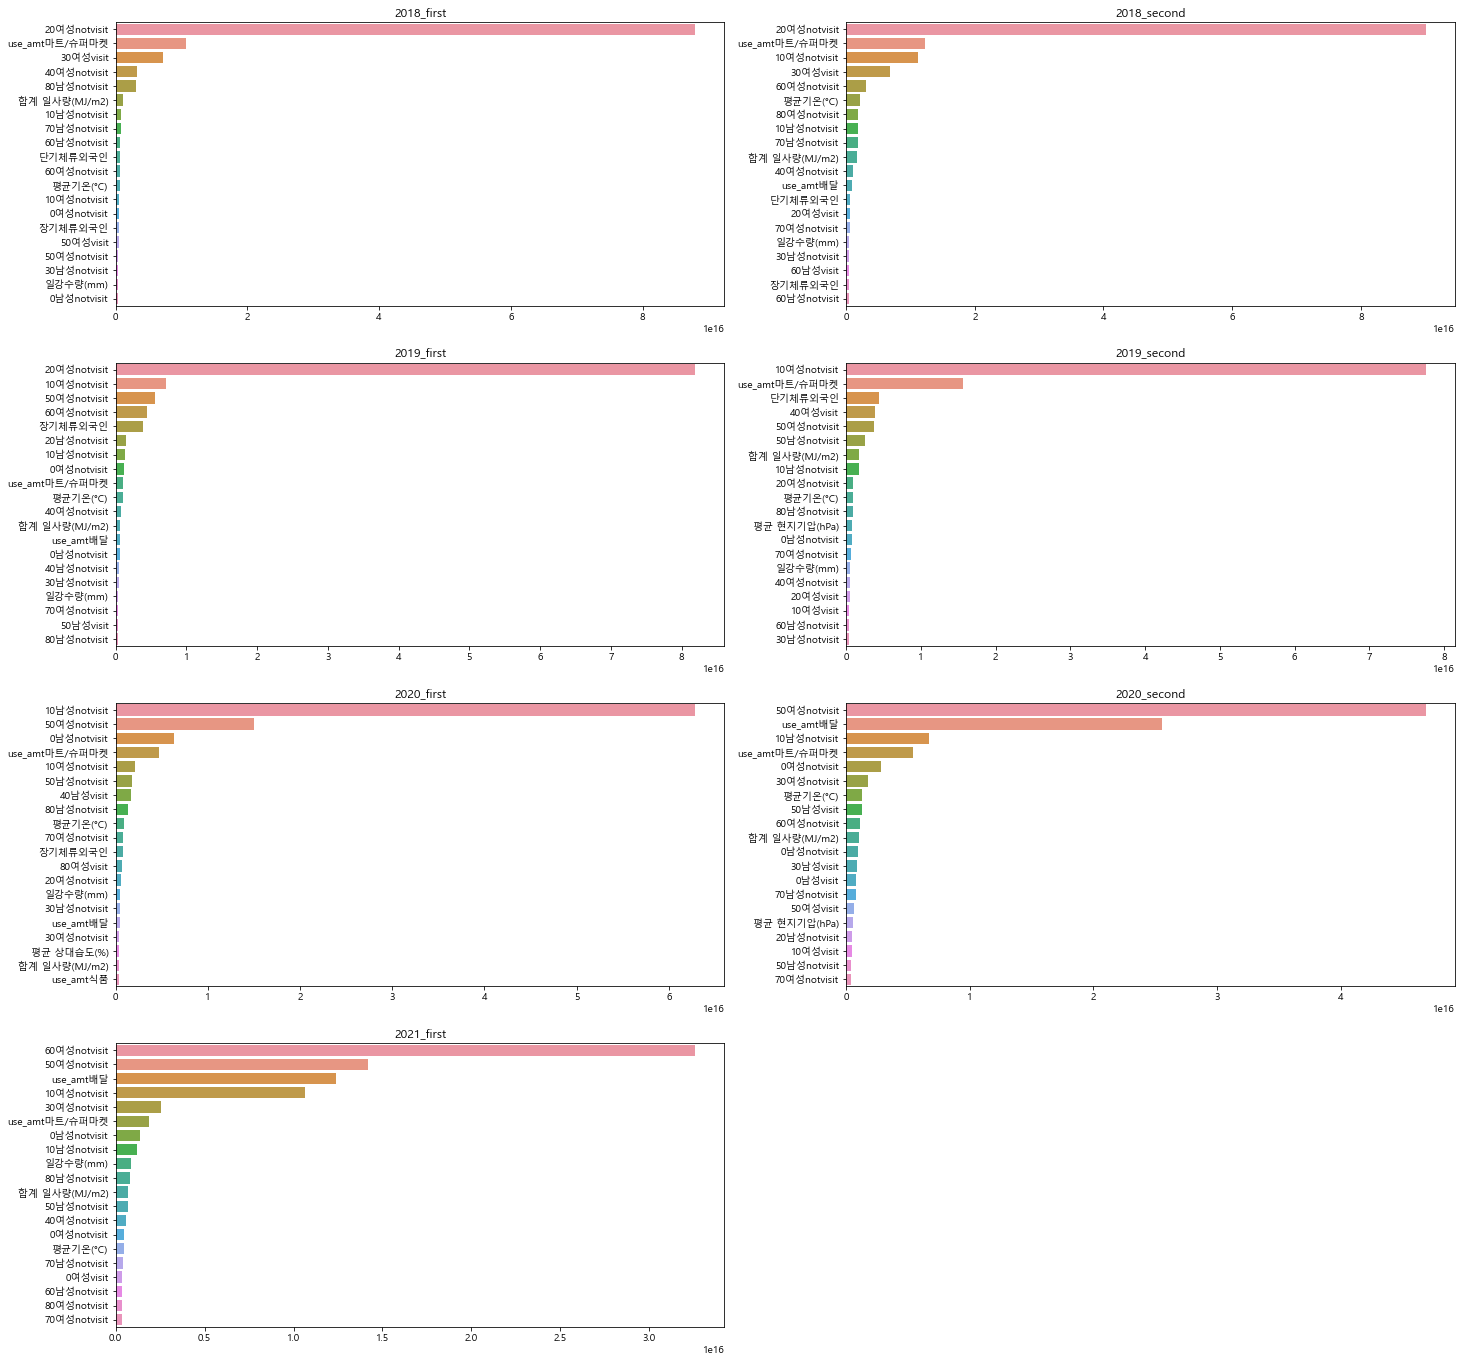

In [10]:
plt.figure(figsize=(24, 24))

plt.subplot(4, 2, 1)
feature_series_1 = pd.Series(data=lgbm_reg_2018_first.feature_importances_, index=X_data_2018_first.columns)
feature_series_1 = feature_series_1.sort_values(ascending=False)
sns.barplot(x=feature_series_1[:20], y=feature_series_1[:20].index)
plt.title('2018_first')

plt.subplot(4, 2, 2)
feature_series_2 = pd.Series(data=lgbm_reg_2018_second.feature_importances_, index=X_data_2018_second.columns)
feature_series_2 = feature_series_2.sort_values(ascending=False)
sns.barplot(x=feature_series_2[:20], y=feature_series_2[:20].index)
plt.title('2018_second')

plt.subplot(4, 2, 3)
feature_series_3 = pd.Series(data=lgbm_reg_2019_first.feature_importances_, index=X_data_2019_first.columns)
feature_series_3 = feature_series_3.sort_values(ascending=False)
sns.barplot(x=feature_series_3[:20], y=feature_series_3[:20].index)
plt.title('2019_first')

plt.subplot(4, 2, 4)
feature_series_4 = pd.Series(data=lgbm_reg_2019_second.feature_importances_, index=X_data_2019_second.columns)
feature_series_4 = feature_series_4.sort_values(ascending=False)
sns.barplot(x=feature_series_4[:20], y=feature_series_4[:20].index)
plt.title('2019_second')

plt.subplot(4, 2, 5)
feature_series_5 = pd.Series(data=lgbm_reg_2020_first.feature_importances_, index=X_data_2020_first.columns)
feature_series_5 = feature_series_5.sort_values(ascending=False)
sns.barplot(x=feature_series_5[:20], y=feature_series_5[:20].index)
plt.title('2020_first')

plt.subplot(4, 2, 6)
feature_series_6 = pd.Series(data=lgbm_reg_2020_second.feature_importances_, index=X_data_2020_second.columns)
feature_series_6 = feature_series_6.sort_values(ascending=False)
sns.barplot(x=feature_series_6[:20], y=feature_series_6[:20].index)
plt.title('2020_second')

plt.subplot(4, 2, 7)
feature_series_7 = pd.Series(data=lgbm_reg_2021_first.feature_importances_, index=X_data_2021_first.columns)
feature_series_7 = feature_series_7.sort_values(ascending=False)
sns.barplot(x=feature_series_7[:20], y=feature_series_7[:20].index)
plt.title('2021_first')

plt.show()